In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
# 载入数据，空格为间隔
df = pd.read_csv('ad_performance.txt', delimiter='\t')

# 数据概观
df.tail(5)

,渠道代号,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,素材类型,广告类型,合作方式,广告尺寸,广告卖点
884,A38,1777.75,0.0002,0.0023,1.2588,513.28,0.0002,5.0,swf,通栏,cpc,900*120,打折
885,A39,1953.53,0.0003,0.0026,1.1703,633.08,0.0002,16.0,swf,通栏,cpc,900*120,打折
886,A40,310.53,0.0002,0.0028,1.1546,543.80,0.0001,22.0,swf,通栏,cpc,900*120,打折
887,A41,1370.38,0.0001,0.0016,1.3939,613.32,0.0001,10.0,swf,通栏,cpd,900*120,打折
888,A826,0.86,0.0000,0.0000,52.6591,1932.61,0.0000,19.0,gif,暂停,cpc,390*270,直降


In [3]:
df.isnull().sum()

渠道代号      0
日均UV      0
平均注册率     0
平均搜索量     0
访问深度      0
平均停留时间    2
订单转化率     0
投放总时间     0
素材类型      0
广告类型      0
合作方式      0
广告尺寸      0
广告卖点      0
dtype: int64

In [4]:
df.describe().round(3)

F:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间
count,889.000,889.000,889.000,889.000,887.000,889.000,889.000
mean,540.847,0.001,0.030,2.167,262.669,0.003,16.053
std,1634.410,0.003,0.106,3.801,224.365,0.012,8.509
min,0.060,0.000,0.000,1.000,1.640,0.000,1.000
25%,6.180,0.000,0.001,1.392,NaN,0.000,9.000
50%,114.180,0.000,0.003,1.793,NaN,0.000,16.000
75%,466.870,0.001,0.012,2.216,NaN,0.002,24.000
max,25294.770,0.039,1.037,98.980,4450.830,0.216,30.000


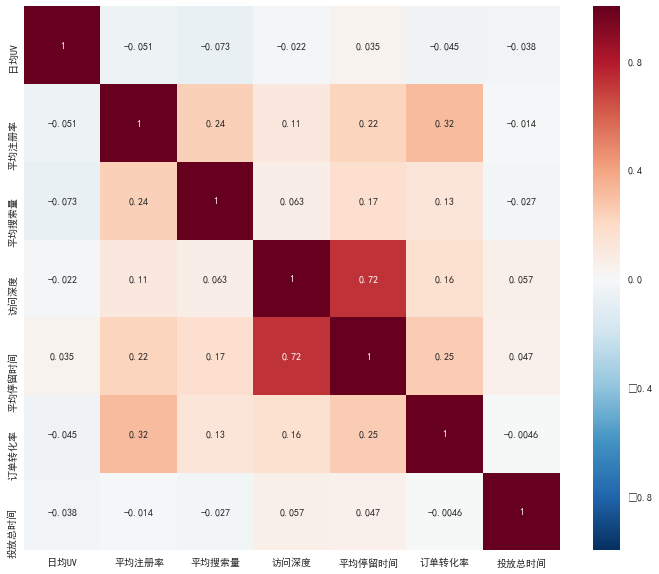

In [5]:
plt.figure(figsize=(12,10))  
# 画热力图，数值为两个变量之间的相关系数
p=sns.heatmap(df.corr(), annot=True) 
plt.show()

In [6]:
# 使用平均值替换缺失值
df['平均停留时间'] = df['平均停留时间'].fillna(df['平均停留时间'].mean())

# 字符串分类转整数分类
conver_cols = ['素材类型', '广告类型', '合作方式', '广告尺寸', '广告卖点']
        
# 用get_dummies进行one hot编码
dummy_df = pd.get_dummies(df[conver_cols])

# 清除原来的特征
df2 = df.drop(conver_cols, axis=1) 
# 当axis = 1的时候，concat就是行对齐，然后将不同列名称的两张表合并
df2 = pd.concat([df2, dummy_df], axis=1) 

In [7]:
df2.tail().T

,884,885,886,887,888
渠道代号,A38,A39,A40,A41,A826
日均UV,1777.75,1953.53,310.53,1370.38,0.86
平均注册率,0.0002,0.0003,0.0002,0.0001,0
平均搜索量,0.0023,0.0026,0.0028,0.0016,0
访问深度,1.2588,1.1703,1.1546,1.3939,52.6591
平均停留时间,513.28,633.08,543.8,613.32,1932.61
订单转化率,0.0002,0.0002,0.0001,0.0001,0
投放总时间,5,16,22,10,19
素材类型_gif,0,0,0,0,1
素材类型_jpg,0,0,0,0,0


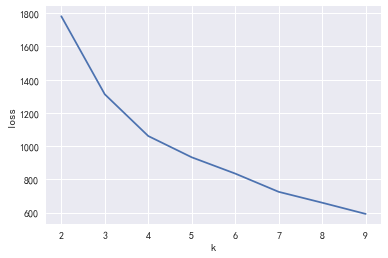

In [8]:

# 获取数值特征转换成矩阵
scale_matrix = df2.iloc[:, 1:8]
# 建立MinMaxScaler模型对象
minmax_scaler = MinMaxScaler()
# 标准化数据
df2.iloc[:, 1:8] = minmax_scaler.fit_transform(scale_matrix)
X = np.array(df2.iloc[:,1:])

# 肘部法则
loss = []
for i in range(2,10):
    model = KMeans(n_clusters=i).fit(X)
    loss.append(model.inertia_)
    
plt.plot(range(2,10),loss)
plt.xlabel('k')
plt.ylabel('loss')
plt.show()

In [9]:
k = 4
model = KMeans(n_clusters=k).fit(X)

# 将最优情况的标签整合到原始数据上
df['clusters'] = model.labels_

# 每个聚类的样本量
cluster_count = pd.DataFrame(df.clusters.value_counts()).rename(columns={'clusters': 'counts'})
# 获取样本占比
cluster_count['percentage'] = (cluster_count['counts']/cluster_count['counts'].sum()).round(2)
cluster_count.head()

,counts,percentage
0,381,0.43
1,276,0.31
3,157,0.18
2,75,0.08


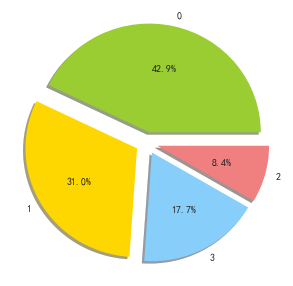

In [10]:
# 设置颜色
colors='yellowgreen','gold','lightskyblue','lightcoral'
# 设置分离
explode=0.1,0.1,0.1,0.1
# 设置画幅
plt.figure(figsize=(5, 5))
# 作图
plt.pie(cluster_count.counts,explode=explode,labels=cluster_count.index,colors=colors,autopct='%1.1f%%',shadow=True)
plt.show()

In [11]:
df.describe()

,日均UV,平均注册率,平均搜索量,访问深度,平均停留时间,订单转化率,投放总时间,clusters
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,540.846772,0.001408,0.030493,2.167166,262.669188,0.002852,16.052868,1.008999
std,1634.410463,0.003291,0.106199,3.800528,224.112126,0.011608,8.509435,1.104820
min,0.060000,0.000000,0.000000,1.000000,1.640000,0.000000,1.000000,0.000000
25%,6.180000,0.000000,0.000600,1.392300,126.200000,0.000000,9.000000,0.000000
50%,114.180000,0.000000,0.003200,1.793100,236.660000,0.000200,16.000000,1.000000
75%,466.870000,0.001400,0.011800,2.216200,357.930000,0.002000,24.000000,2.000000
max,25294.770000,0.039100,1.037000,98.979900,4450.830000,0.216500,30.000000,3.000000


In [12]:
df.describe(include=['O'])  

,渠道代号,素材类型,广告类型,合作方式,广告尺寸,广告卖点
count,889,889,889,889,889,889
unique,889,4,6,4,8,6
top,A98,jpg,不确定,cpc,600*90,打折
freq,1,536,654,592,645,337


In [13]:
# 空列表，用于存储最终合并后的所有特征信息
cluster_features = []  
# 读取每个类索引
for line in range(k):  
    # 获得特定类的数据
    label_data = df[df['clusters'] == line]  
    # 获得数值型数据特征
    part1_data = label_data.iloc[:, 1:8]  
    # 得到数值型特征的描述性统计信息
    part1_desc = part1_data.describe().round(3) 
    # 得到数值型特征的均值
    merge_data1 = part1_desc.iloc[1, :]  
    # 获得字符串型数据特征
    part2_data = label_data.iloc[:, 8:-1]  
    # 获得字符串型数据特征的描述性统计信息
    part2_desc = part2_data.describe(include='all')  
    # 获得字符串型数据特征的最频繁值
    merge_data2 = part2_desc.iloc[2, :]  
    # 将数值型和字符串型典型特征沿行合并
    merge_line = pd.concat((merge_data1, merge_data2), axis=0)  
    # 将每个类别下的数据特征追加到列表
    cluster_features.append(merge_line)  
# 将列表转化为矩阵
cluster_pd = pd.DataFrame(cluster_features) 
# 将信息合并
all_cluster_set = cluster_count.join(cluster_pd).sort_index().T
all_cluster_set


,0,1,2,3
counts,381,276,75,157
percentage,0.43,0.31,0.08,0.18
日均UV,311.403,598.991,1368.3,600.153
平均注册率,0.001,0.001,0.001,0.003
平均搜索量,0.02,0.051,0.032,0.02
访问深度,2.186,2.065,2.417,2.182
平均停留时间,233.569,267.77,434.877,242.058
订单转化率,0.002,0.004,0.002,0.003
投放总时间,15.593,17.033,15.587,15.669
素材类型,jpg,swf,swf,jpg


聚类0：各方面的特征都不明显，换句话说就是效果比较平庸，没有明显的优势或短板。但这些“中庸”的广告媒体却构成了整个广告的主体。因此需要业务部门重点考虑其投放的实际价值。

聚类1：这类广告媒体在访问深度、平均停留时间、订单转化率以及平均搜索量等流量质量的特征上的表现较好，除了注册转化率较低外，该类渠道各方面比较均衡。更重要的是该类媒体的数量占据了31%的数量，因此是一类规模较大且综合效果较好的媒体。聚类1的广告渠道的短板是日均UV和平均注册率，因此该类媒体无法为企业带来大量的流量以及新用户。不过这类广告订单转化率高适合有关订单转化的提升。

聚类2：这类广告媒体渠道效果很好，特别是日均UV和用户停留时间表现很好，但综合其只占8%的媒体数量，由于实例比较少，不排除是因为个例导致效果扩大，可以合理增加此类渠道投放，继续深入测试其真实效果。

聚类3：这类渠道其日均UV还不错，平均注册率非常突出，证明这是一类“引流”+“拉新”的渠道，适合在大规模的广告宣传和引流时使用。

